In [8]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statistics as stats
import pylab 
from scipy.signal import find_peaks

In [9]:
pvt = pd.read_csv("PVT.csv")
survey_qs = pd.read_csv("Cognitive_Fatigue_Data.csv")
pulse = pd.read_csv("Pulse/ShreyaJainHeartbeat.csv", skiprows = 6, names = ['Time', 'mV'])


In [10]:
# Determining who is fatigued and who isn't based on Reaction Time

In [11]:
pvt.describe()

,Yariel,David,Vineet,Edward,Carol,Joy,Sharvill,Esteban,Pratik,Adi,...,Mariela,Anna,Elaine,Harris,Vishal,Shuen,Varun,Other Joy,Govind,Suat
count,43.000000,43.000000,44.000000,43.000000,44.000000,43.000000,42.000000,46.000000,44.000000,41.000000,...,39.000000,36.000000,40.000000,38.000000,39.000000,39.000000,43.000000,40.0000,42.000000,44.000000
mean,211305.813953,235034.418605,204089.340909,208359.465116,174654.613636,244750.930233,219025.619048,186274.978261,207329.636364,170616.243902,...,191046.512821,230374.861111,258813.200000,207254.736842,232919.589744,175527.923077,197082.093023,225146.1250,176010.119048,238906.227273
std,46544.057097,49123.615491,69888.420829,36784.329663,49023.469009,69849.958247,45587.329506,30302.832463,54921.768196,70358.933430,...,18057.411888,40543.548723,62290.422494,27936.098751,45375.814416,21426.823914,23808.241397,45054.6639,22826.632597,73750.738463
min,131447.000000,174536.000000,148615.000000,108443.000000,46944.000000,162805.000000,166599.000000,137429.000000,1.000000,1.000000,...,146216.000000,181448.000000,177127.000000,167014.000000,185014.000000,147590.000000,148424.000000,158420.0000,137907.000000,168526.000000
25%,185472.500000,197629.000000,167325.750000,188043.000000,156353.750000,207706.000000,190260.750000,166762.250000,181039.250000,154040.000000,...,180826.500000,203368.500000,214996.500000,188642.000000,204070.500000,160183.500000,183019.500000,198491.7500,157949.250000,194345.750000
50%,204858.000000,228048.000000,188276.500000,205800.000000,166059.500000,231938.000000,203100.000000,178419.000000,198142.500000,169635.000000,...,190111.000000,219879.500000,247472.000000,201431.000000,218073.000000,172624.000000,191787.000000,207582.5000,175525.500000,216631.000000
75%,219083.500000,248568.000000,201819.250000,215268.500000,177415.750000,257430.500000,235047.500000,199894.500000,228846.750000,191325.000000,...,201145.000000,242882.250000,292031.500000,218175.500000,241520.000000,182182.500000,213121.500000,236759.7500,187292.250000,262394.500000
max,424669.000000,421483.000000,488581.000000,350614.000000,403448.000000,586621.000000,366579.000000,298522.000000,372462.000000,338060.000000,...,239258.000000,385076.000000,403696.000000,280442.000000,426563.000000,249035.000000,261980.000000,386733.0000,231590.000000,613407.000000


In [12]:
survey_qs

,Name,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine
0,Anna,7.00,7.0,0,8.0,3.0,0.00
1,Elaine,8.00,4.0,0,3.0,7.0,1.00
2,Mariela,4.00,4.0,0,5.0,1.0,0.00
3,Harris,6.00,6.0,15,6.0,3.0,0.00
4,Oddessa,5.50,6.0,30,7.0,7.0,2.00
5,Shreya,8.00,2.0,60,9.0,1.0,0.00
6,Varun,6.00,3.0,0,9.0,2.0,0.00
7,Joy Liu,6.50,5.0,10,10.0,8.0,0.50
8,Vishal,6.00,3.0,0,8.0,3.0,0.00
9,Shuen,4.00,8.0,0,4.0,7.0,1.00


In [13]:
pvt = pvt[pvt>100000]
pvt_mean = pvt.mean()
pvt_mean

Yariel       211305.813953
David        235034.418605
Vineet       204089.340909
Edward       208359.465116
Carol        177624.627907
Joy          244750.930233
Sharvill     219025.619048
Esteban      186274.978261
Pratik       212151.232558
Adi          188077.243243
Alex         239858.044444
Odessa       210327.162791
Shreya       199415.023256
Mariela      191046.512821
Anna         230374.861111
Elaine       258813.200000
Harris       207254.736842
Vishal       232919.589744
Shuen        175527.923077
Varun        197082.093023
Other Joy    225146.125000
Govind       176010.119048
Suat         238906.227273
dtype: float64

In [14]:
median_pvt = stats.median(pvt_mean)
#pvt_mean = pvt.mean()
#pvt_mean
median_pvt

210327.16279069768

In [15]:
fatigued = pvt_mean[pvt_mean>median_pvt]
fatigued

Yariel       211305.813953
David        235034.418605
Joy          244750.930233
Sharvill     219025.619048
Pratik       212151.232558
Alex         239858.044444
Anna         230374.861111
Elaine       258813.200000
Vishal       232919.589744
Other Joy    225146.125000
Suat         238906.227273
dtype: float64

In [16]:
not_fatigued = pvt_mean[pvt_mean<=median_pvt]
not_fatigued

Vineet     204089.340909
Edward     208359.465116
Carol      177624.627907
Esteban    186274.978261
Adi        188077.243243
Odessa     210327.162791
Shreya     199415.023256
Mariela    191046.512821
Harris     207254.736842
Shuen      175527.923077
Varun      197082.093023
Govind     176010.119048
dtype: float64

Text(0.5, 1.0, 'Histogram of Medlytics Class Reactions')

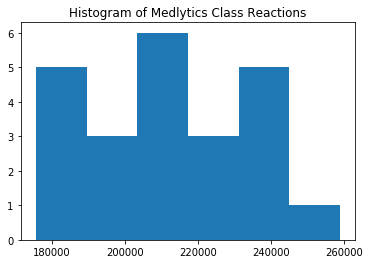

In [17]:
plt.hist(pvt_mean, bins=6) # bins = number of bars in the histogram
plt.title("Histogram of Medlytics Class Reactions")


In [18]:
label = pvt_mean > median_pvt # false = not fatigued, true = fatigued
label

Yariel        True
David         True
Vineet       False
Edward       False
Carol        False
Joy           True
Sharvill      True
Esteban      False
Pratik        True
Adi          False
Alex          True
Odessa       False
Shreya       False
Mariela      False
Anna          True
Elaine        True
Harris       False
Vishal        True
Shuen        False
Varun        False
Other Joy     True
Govind       False
Suat          True
dtype: bool

In [19]:
# identify columns by what type of data they hold -- first numeric columns
numeric_columns = list(["Income", "Alcohol", "Cholesterol", "Age"])

# categorical columns are everything else 
categorical_columns = list(set(mydat.columns) - set(numeric_columns))

# convert numeric columns from strings to numbers
mydat[numeric_columns] = mydat[numeric_columns].apply(pd.to_numeric)

NameError: name 'mydat' is not defined

In [80]:
pulse.head(10)


,Time,mV
0,Time,NaN
1,'0:0:0.0,348.0
2,'0:0:0.02,341.0
3,'0:0:0.04,331.0
4,'0:0:0.06,329.0
5,'0:0:0.08,327.0
6,'0:0:0.1,325.0
7,'0:0:0.12,327.0
8,'0:0:0.14,333.0
9,'0:0:0.16,334.0


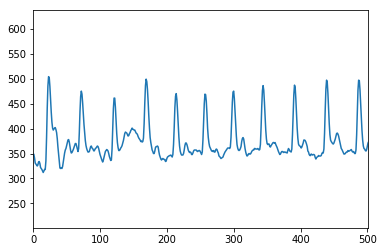

In [20]:
plt.plot(pulse['mV'])
pylab.xlim(0,501) # this is the first 10 seconds
plt.show()

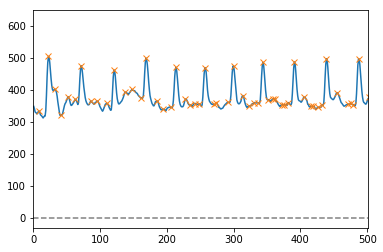

In [30]:
from scipy.misc import electrocardiogram
# x = electrocardiogram()[0:501]

peaks, _ = find_peaks(pulse['mV'])
plt.plot(pulse['mV'])
plt.plot(peaks, pulse['mV'][peaks], "x")
plt.plot(np.zeros_like(pulse['mV']), "--", color="gray")
pylab.xlim(0,501)
plt.show()

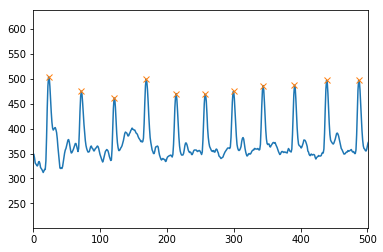

In [62]:
fs = 50
peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
np.diff(peaks)
plt.plot(pulse['mV'])
plt.plot(peaks, pulse['mV'][peaks], "x")
pylab.xlim(0,501)
plt.show()

In [57]:
peaks[peaks<501].shape[0]*6

66

In [69]:
# gets number of beats per min by multiplying the number of heartbeats in first 10 seconds by 6
def get_heartrate(name):
        pulse = pd.read_csv("Pulse/"+name+"Heartbeat.csv", skiprows = 6, names = ['Time', 'mV'])
        peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
        # np.diff(peaks)
        result = peaks[peaks<501].shape[0]*6
        return result

In [70]:
names = ['AadiDass-Vattam','AlexYu','AnnaHe','CarolZhang','DavidDelValle','EdwardYan','ElaineChu','EstebanCintron','GovindChada','HarrisBubalo','JoyLim','JoyLiu','MarielaNazarioCastro','OdessaThompson','PratikBharadwaj','SharvilTrifale','ShreyaJain','ShuenWu','SuatMartin','VarunNair','VineetChinthakindi','VishalKumar','YerielMaldonado']

In [78]:
heart_rates = pd.DataFrame(index=np.arange(1),columns = names)
for i in range(len(names)):
    heart_rates.iloc[0,i]=get_heartrate(names[i])

In [79]:
heart_rates

,AadiDass-Vattam,AlexYu,AnnaHe,CarolZhang,DavidDelValle,EdwardYan,ElaineChu,EstebanCintron,GovindChada,HarrisBubalo,...,OdessaThompson,PratikBharadwaj,SharvilTrifale,ShreyaJain,ShuenWu,SuatMartin,VarunNair,VineetChinthakindi,VishalKumar,YerielMaldonado
0,72,60,66,60,72,72,66,60,66,66,...,72,78,72,66,60,66,60,66,66,60


In [83]:
# gets number of beats per min by dividing the number of heartbeats in full 2 min by 2
def get_heartrate_avg(name):
        pulse = pd.read_csv("Pulse/"+name+"Heartbeat.csv", skiprows = 6, names = ['Time', 'mV'])
        peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
        # np.diff(peaks)
        result = peaks.shape[0]/2
        return result

In [84]:
avg_heart_rates = pd.DataFrame(index=np.arange(1),columns = names)
for i in range(len(names)):
    avg_heart_rates.iloc[0,i]=get_heartrate_avg(names[i])

In [85]:
avg_heart_rates

,AadiDass-Vattam,AlexYu,AnnaHe,CarolZhang,DavidDelValle,EdwardYan,ElaineChu,EstebanCintron,GovindChada,HarrisBubalo,...,OdessaThompson,PratikBharadwaj,SharvilTrifale,ShreyaJain,ShuenWu,SuatMartin,VarunNair,VineetChinthakindi,VishalKumar,YerielMaldonado
0,72,57,74.5,70,75.5,68.5,69,64.5,71,73.5,...,72,74.5,71.5,67,68,70,62.5,61,65.5,59


In [87]:
# This calculates the heart rate using Chris' formula
def get_heartrate_formula(name):
        pulse = pd.read_csv("Pulse/"+name+"Heartbeat.csv", skiprows = 6, names = ['Time', 'mV'])
        peaks, _ = find_peaks(pulse['mV'], distance=fs*40/60)
        # np.diff(peaks)
        result = np.mean(np.diff(peaks) / fs * 60)
        return result

In [95]:
get_heartrate_formula('AlexYu')

63.39823008849557

In [ ]:
import wav
import struct
import sys
import csv
from scikits.samplerate import resample

def write_wav(filename, framerate, amplitude):
    wavfile = wave.open(filename,"wb")
    